# Predicting Credit Card Application Approval

# 1. Loading and viewing the dataset


In [ ]:
# Import pandas
import pandas as pd

#Load dataset from local drive
from google.colab import files
import io

uploaded = files.upload() # Will prompt to select file
cc_approvals = pd.read_csv(io.BytesIO(uploaded['original dataset.csv']))

Saving original dataset.csv to original dataset.csv


# 2. EDA

In [ ]:
# Inspect data
print(cc_approvals.head())

   b  30.83      0  u  g  w  v  1.25  t t.1  01  f g.1  00202  0.1  +
0  a  58.67  4.460  u  g  q  h  3.04  t   t   6  f   g  00043  560  +
1  a  24.50  0.500  u  g  q  h  1.50  t   f   0  f   g  00280  824  +
2  b  27.83  1.540  u  g  w  v  3.75  t   t   5  t   g  00100    3  +
3  b  20.17  5.625  u  g  w  v  1.71  t   f   0  f   s  00120    0  +
4  b  32.08  4.000  u  g  m  v  2.50  t   f   0  t   g  00360    0  +


In [ ]:
# Print summary statistics
print(cc_approvals.describe())

                0        1.25          01            0.1
count  689.000000  689.000000  689.000000     689.000000
mean     4.765631    2.224819    2.402032    1018.862119
std      4.978470    3.348739    4.866180    5213.743149
min      0.000000    0.000000    0.000000       0.000000
25%      1.000000    0.165000    0.000000       0.000000
50%      2.750000    1.000000    0.000000       5.000000
75%      7.250000    2.625000    3.000000     396.000000
max     28.000000   28.500000   67.000000  100000.000000


In [ ]:
# Print DataFrame information
print(cc_approvals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       689 non-null    object 
 1   30.83   689 non-null    object 
 2   0       689 non-null    float64
 3   u       689 non-null    object 
 4   g       689 non-null    object 
 5   w       689 non-null    object 
 6   v       689 non-null    object 
 7   1.25    689 non-null    float64
 8   t       689 non-null    object 
 9   t.1     689 non-null    object 
 10  01      689 non-null    int64  
 11  f       689 non-null    object 
 12  g.1     689 non-null    object 
 13  00202   689 non-null    object 
 14  0.1     689 non-null    int64  
 15  +       689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB
None


In [ ]:
# Display last few rows of the dataset
print(cc_approvals.tail())

     b  30.83       0  u  g   w   v  1.25  t t.1  01  f g.1  00202  0.1  +
684  b  21.08  10.085  y  p   e   h  1.25  f   f   0  f   g  00260    0  -
685  a  22.67   0.750  u  g   c   v  2.00  f   t   2  t   g  00200  394  -
686  a  25.25  13.500  y  p  ff  ff  2.00  f   t   1  t   g  00200    1  -
687  b  17.92   0.205  u  g  aa   v  0.04  f   f   0  f   g  00280  750  -
688  b  35.00   3.375  u  g   c   h  8.29  f   f   0  t   g  00000    0  -


# 3. Data Cleaning

## 3.1 Feature names
The features of the orginal dataset were anonymised to protect the privacy of the clients, but following is a list of the probable feature names. Some of them have been changed based on own assumptions. The following names might not be completely accurate but at least they provide some context to the dataset.

In [ ]:
#rename specific column names
cc_approvals.rename(columns = {'b':'Gender', '30.83':'Age', '0':'Debt', 'u':'Married', 'g':'BankCustomer', 'w':'Industry', 'v':'Ethnicity', '1.25':'YearsEmployed', 't':'PriorDefault', 't.1':'Employed', '01':'CreditScore', 'f':'DriversLicense', 'g.1':'Citizen', '00202':'ZipCode', '0.1':'Income', '+':'Approved'}, inplace = True)

In [ ]:
print(cc_approvals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             689 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   Industry        689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  Approved        689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB
None


## 3.2 Missing values
Missing values are denoted by '?' in the original dataset.

In [ ]:
# Calculate missing values
mv_df=pd.DataFrame(columns = ['Feature', 'NumberMissing'])
for col in cc_approvals.columns:
    mv_df=mv_df.append({'Feature':col, 'NumberMissing':(cc_approvals[col]=='?').sum()},  ignore_index=True)

# Show dataframe
mv_df

,Feature,NumberMissing
0,Gender,12
1,Age,12
2,Debt,0
3,Married,6
4,BankCustomer,6
5,Industry,9
6,Ethnicity,9
7,YearsEmployed,0
8,PriorDefault,0
9,Employed,0


### 3.3.1 Gender

In [ ]:
cc_approvals['Gender'].value_counts()

b    467
a    210
?     12
Name: Gender, dtype: int64

In [ ]:
# Rename entries
cc_approvals['Gender'].replace('a', 0, inplace=True)
cc_approvals['Gender'].replace('b', 1, inplace=True)

# Fill missing values with mode
cc_approvals['Gender'].replace('?', 1, inplace=True)

# Convert to integer type
cc_approvals['Gender']=cc_approvals['Gender'].astype(int)

### 3.3.2 Age

In [ ]:
cc_approvals['Age'].value_counts()

?        12
22.67     9
20.42     7
25.00     6
19.17     6
         ..
28.33     1
18.75     1
18.50     1
40.25     1
36.42     1
Name: Age, Length: 349, dtype: int64

In [ ]:
# Identify median age
median_age=cc_approvals.loc[cc_approvals['Age']!='?','Age'].median()
print('Median age', median_age)

# Fill missing values with median
cc_approvals.loc[cc_approvals['Age']=='?','Age']=median_age

# Convert to float type
cc_approvals['Age']=cc_approvals['Age'].astype(float)

Median age 28.42


### 3.3.3 Married

In [ ]:
cc_approvals['Married'].value_counts()

u    518
y    163
?      6
l      2
Name: Married, dtype: int64

These likely refer to single (y), married (u) and divorced (l).

In [ ]:
# Fill missing values with mode
cc_approvals.loc[cc_approvals['Married']=='?','Married']='u'

# Combine divorced with single (as there are only 2 entries)
cc_approvals.loc[cc_approvals['Married']=='l','Married']='y'

# Convert to binary feature (u=Married, y=Single/Divorced)
cc_approvals.loc[cc_approvals['Married']=='u','Married']=1
cc_approvals.loc[cc_approvals['Married']=='y','Married']=0

# Convert to int type
cc_approvals['Married']=cc_approvals['Married'].astype(int)

### 3.3.4 BankCustomer

In [ ]:
cc_approvals['BankCustomer'].value_counts()

g     518
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64

These categories could refer to having a bank account (g) and not having a bank account (p).

In [ ]:
# Fill missing values with mode
cc_approvals.loc[cc_approvals['BankCustomer']=='?','BankCustomer']='g'

# Combine gg with g (as there are only 2 entries)
cc_approvals.loc[cc_approvals['BankCustomer']=='gg','BankCustomer']='g'

# Convert to binary feature (gg=has bank account, p=does not have bank account)
cc_approvals.loc[cc_approvals['BankCustomer']=='g','BankCustomer']=1
cc_approvals.loc[cc_approvals['BankCustomer']=='p','BankCustomer']=0

# Convert to int type
cc_approvals['BankCustomer']=cc_approvals['BankCustomer'].astype(int)

### 3.3.5 Industry
Industry refers to the sector that a person works in (if they are currently unemployed then it refers to their most recent job).

In [ ]:
cc_approvals['Industry'].value_counts()

c     137
q      78
w      63
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: Industry, dtype: int64

In [ ]:
# Fill missing values with mode
cc_approvals.loc[cc_approvals['Industry']=='?','Industry']='c'

# Rename categories
cc_approvals['Industry'].replace({'c':'Energy','q':'Materials','w':'Industrials','i':'ConsumerDiscretionary','aa':'ConsumerStaples','ff':'Healthcare','k':'Financials','cc':'InformationTechnology','m':'CommunicationServices','x':'Utilities','d':'Real Estate','e':'Education','j':'Research','r':'Transport'}, inplace=True)

### 3.3.6 Ethnicity

In [ ]:
cc_approvals['Ethnicity'].value_counts()

v     398
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

In [ ]:
# Fill missing values with mode
cc_approvals.loc[cc_approvals['Ethnicity']=='?','Ethnicity']='v'

# Combine minority groups together
cc_approvals.loc[cc_approvals['Ethnicity'].isin(['j','z','dd','n','o']),'Ethnicity']='Other'

# Rename categories
cc_approvals['Ethnicity'].replace({'v':'White','h':'Black','bb':'Asian','ff':'Latino'}, inplace=True)

### 3.3.7 PriorDefault
This feature does not have missing values but we will rename the entries to make it binary.

In [ ]:
# Rename entries
cc_approvals['PriorDefault'].replace('t', 1, inplace=True)
cc_approvals['PriorDefault'].replace('f', 0, inplace=True)

### 3.3.8 Employed

In [ ]:
# Rename entries
cc_approvals['Employed'].replace('t', 1, inplace=True)
cc_approvals['Employed'].replace('f', 0, inplace=True)

### 3.3.9 DriversLicense

In [ ]:
# Rename entries
cc_approvals['DriversLicense'].replace('t', 1, inplace=True)
cc_approvals['DriversLicense'].replace('f', 0, inplace=True)

### 3.3.10 Citizen

In [ ]:
cc_approvals['Citizen'].value_counts()

g    624
s     57
p      8
Name: Citizen, dtype: int64

This feature does not have missing values. The categories are interpreted as citizen by birth (g), citizen by other means (s) and temporary citizen (p).

In [ ]:
# Rename entries
cc_approvals['Citizen'].replace('g', 'ByBirth', inplace=True)
cc_approvals['Citizen'].replace('s', 'ByOtherMeans', inplace=True)
cc_approvals['Citizen'].replace('p', 'Temporary', inplace=True)

### 3.3.11 ZipCode

In [ ]:
cc_approvals['ZipCode'].value_counts()

00000    132
00120     35
00200     35
00160     34
00100     30
        ... 
00393      1
00395      1
00093      1
00204      1
00256      1
Name: ZipCode, Length: 170, dtype: int64

In [ ]:
# Fill missing values with mode
cc_approvals.loc[cc_approvals['ZipCode']=='?','ZipCode']='00000'

### 3.3.12 Approved

In [ ]:
# Rename entries (1 is approved, 0 is not approved)
cc_approvals['Approved'].replace('-', 0, inplace=True)
cc_approvals['Approved'].replace('+', 1, inplace=True)

In [ ]:
cc_approvals.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,00043,560,1
1,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,00280,824,1
2,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,00100,3,1
3,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,00120,0,1
4,1,32.08,4.000,1,1,CommunicationServices,White,2.50,1,0,0,1,ByBirth,00360,0,1


# 4. Data Visualization

## 4.1 Data distribution

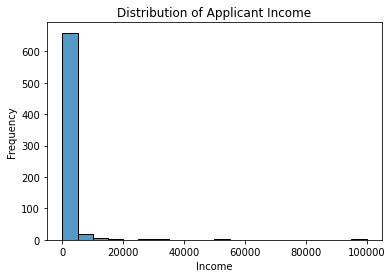

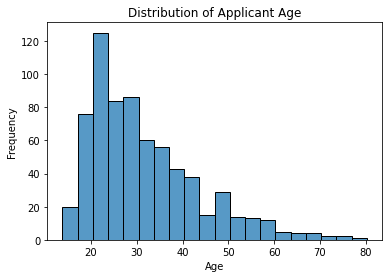

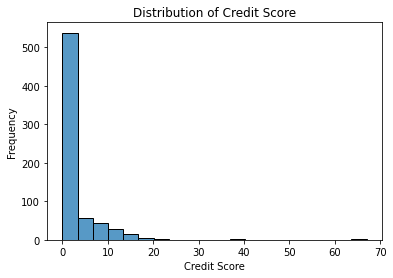

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the applicant income
sns.histplot(cc_approvals['Income'], bins=20)
#plt.xscale('log')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Distribution of Applicant Income")
plt.show()

# Create a histogram of the applicant age
sns.histplot(cc_approvals['Age'])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Applicant Age")
plt.show()

# Create a histogram of the credit score
sns.histplot(cc_approvals['CreditScore'], bins=20)
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.title("Distribution of Credit Score")
plt.show()

## 4.2 Correlation

### 4.2.1 Scatter plot

In [ ]:
# Create a scatter plot of income vs. credit score
sns.scatterplot(x='Income', y='CreditScore', data=cc_approvals)
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.title('Income vs Credit Score')
plt.show()

NameError: name 'sns' is not defined

### 4.2.2 Heatmap

In [ ]:
# Correlation matrix
corr = cc_approvals.corr()

# Create a heatmap
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

NameError: name 'cc_approvals' is not defined

# 5. Preprocessing the data

Also, features like DriversLicense and ZipCode are not as important as the other features in the dataset for predicting credit card approvals.They should be dropped to design the machine learning model with the best set of features.

In [ ]:
# Drop the features 11 and 13
cc_approvals = cc_approvals.drop(['DriversLicense', 'ZipCode'], axis=1)

## 5.1 Convert the non-numeric data into numeric.

In [ ]:
#Categorical encoding using One-Hot encoding
cc_approvals_onehot = cc_approvals.copy()
cc_approvals_onehot = pd.get_dummies(cc_approvals_onehot, columns=['Industry', 'Ethnicity', 'Citizen'], prefix = ['Industry', 'Ethnicity', 'Citizen'])

print(cc_approvals_onehot.head())

   Gender    Age   Debt  Married  BankCustomer  YearsEmployed  PriorDefault  \
0       0  58.67  4.460        1             1           3.04             1   
1       0  24.50  0.500        1             1           1.50             1   
2       1  27.83  1.540        1             1           3.75             1   
3       1  20.17  5.625        1             1           1.71             1   
4       1  32.08  4.000        1             1           2.50             1   

   Employed  CreditScore  Income  ...  Industry_Transport  Industry_Utilities  \
0         1            6     560  ...                   0                   0   
1         0            0     824  ...                   0                   0   
2         1            5       3  ...                   0                   0   
3         0            0       0  ...                   0                   0   
4         0            0       0  ...                   0                   0   

   Ethnicity_Asian  Ethnicity_Black  E

In [ ]:
#Creating feature and target arrays
X = cc_approvals_onehot.drop('Approved', axis=1).values
y = cc_approvals_onehot['Approved'].values

## 5.2 Splitting the dataset into train and test sets
Now, the data is split into train set and test set to prepare it for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to preprocess the training data or should be used to direct the training process of a machine learning model. Hence, the data is first split and then preprocessed.



In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 5.2.1 Data Balancing

In [ ]:
from imblearn.over_sampling import SMOTE
# apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

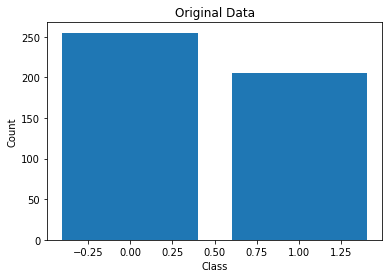

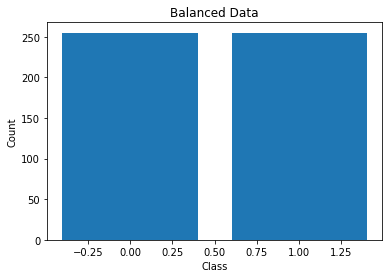

In [ ]:
# get class counts for original data
original_counts = pd.value_counts(y_train)

# get class counts for balanced data
balanced_counts = pd.value_counts(y_train_balanced)

# create bar plots
plt.bar(original_counts.index, original_counts.values)
plt.title('Original Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.bar(balanced_counts.index, balanced_counts.values)
plt.title('Balanced Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 6. Fitting a machine learning model

## 6.1 k-nearest neighbors (k-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
import matplotlib.pyplot as plt

# Create a KNN classifier object
knn = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_balanced,y_train_balanced)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the predictions
print(classification_report(y_test, y_pred))
print("KNeighborsClassifier:>",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       128
           1       0.67      0.64      0.65       100

    accuracy                           0.70       228
   macro avg       0.70      0.70      0.70       228
weighted avg       0.70      0.70      0.70       228

KNeighborsClassifier:> 0.7017543859649122


### 6.1.1 Cross-validation to choose the value of k in a k-nearest neighbors (KNN) classifier

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the range of values for k to consider
k_range = np.arange(1, 31)

# Create a dictionary of values for k to try
param_grid = {'n_neighbors': k_range}

# Use GridSearchCV to perform cross-validation and find the best value of k
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit the classifier to the data
knn_cv.fit(X, y)

# Print the best value of k
print(f'Best value of k: {knn_cv.best_params_["n_neighbors"]}')

Best value of k: 13


              precision    recall  f1-score   support

           0       0.72      0.77      0.74       128
           1       0.68      0.61      0.64       100

    accuracy                           0.70       228
   macro avg       0.70      0.69      0.69       228
weighted avg       0.70      0.70      0.70       228

KNeighborsClassifier:> 0.7017543859649122


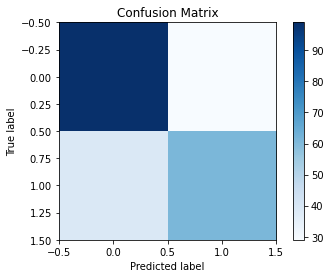

In [ ]:
# Create a KNN classifier object with the best value of k
knn = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=13)

# Fit the classifier to the training data
knn.fit(X_train_balanced,y_train_balanced)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the predictions
print(classification_report(y_test, y_pred))
print("KNeighborsClassifier:>",accuracy_score(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

In [ ]:
# Make predictions on the input data
predictions = knn.predict(X_test)

# Loop through the input data and the predictions, and print them
for i in range(5):
    #print("Input data:", X[i])
    print("Prediction:", predictions[i])
    print("True label:", y[i])
    print()

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 1



0.739375


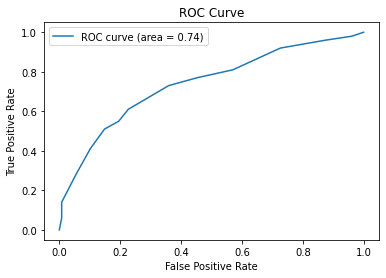

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Then, make predictions on the test set
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Next, calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Finally, calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)  # prints the AUC value

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

## 6.2 Logistic Regression

In [ ]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the accuracy of the predictions
print(classification_report(y_test, predictions))
print("LogisticRegression:>",accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       128
           1       0.78      0.91      0.84       100

    accuracy                           0.85       228
   macro avg       0.85      0.85      0.85       228
weighted avg       0.86      0.85      0.85       228

LogisticRegression:> 0.8464912280701754


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.80      0.85       128
           1       0.78      0.91      0.84       100

    accuracy                           0.85       228
   macro avg       0.85      0.85      0.85       228
weighted avg       0.86      0.85      0.85       228

KNeighborsClassifier:> 0.8464912280701754


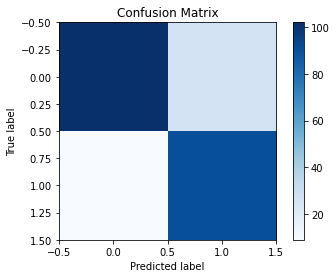

In [ ]:
# Define the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_test)

# Calculate the accuracy
#accuracy = accuracy_score(y_val, y_pred)
#print("Accuracy:", accuracy)

# Calculate the accuracy of the predictions
print(classification_report(y_test, y_pred))
print("KNeighborsClassifier:>",accuracy_score(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

In [ ]:
# Make predictions on the input data
predictions = model.predict(X_test)

# Loop through the input data and the predictions, and print them
for i in range(10):
    #print("Input data:", X[i])
    print("Prediction:", predictions[i])
    print("True label:", y[i])
    print()

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 1



0.9253906250000001


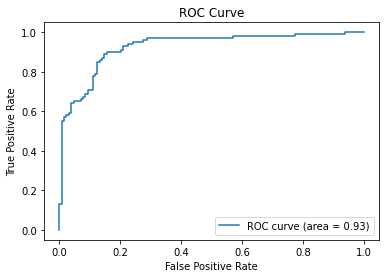

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Then, make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Next, calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Finally, calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)  # prints the AUC value

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

## 6.3 Support vector machines (SVMs)

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       128
           1       0.78      0.95      0.86       100

    accuracy                           0.86       228
   macro avg       0.87      0.87      0.86       228
weighted avg       0.88      0.86      0.86       228

support vector machine (SVM) classifier:> 0.8596491228070176


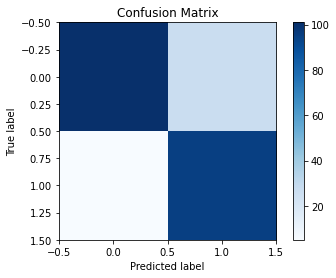

In [ ]:
# Import the necessary libraries
from sklearn import svm

# Create a support vector machine (SVM) classifier
model = svm.SVC(kernel='linear')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the accuracy of the predictions
print(classification_report(y_test, predictions))
print("support vector machine (SVM) classifier:>",accuracy_score(y_test, predictions))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
# Visualize the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

## 6.4 Random Forests.

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
model = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the accuracy of the predictions
print(classification_report(y_test, predictions))
print("RandomForestClassifierr:>",accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.92      0.88      0.90       128
           1       0.86      0.90      0.88       100

    accuracy                           0.89       228
   macro avg       0.89      0.89      0.89       228
weighted avg       0.89      0.89      0.89       228

RandomForestClassifierr:> 0.8903508771929824


### 6.4.1 Grid Search

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import GridSearchCV

# Create a random forest classifier
model = RandomForestClassifier()

# Create a dictionary of hyperparameters to tune
param_grid = {'n_estimators': [100, 200, 300, 400, 500]}

# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)

# Train the model on the training data
grid_search.fit(X_train, y_train)

# Make predictions on the test data
predictions = grid_search.predict(X_test)

# Print the best value for n_estimators found during the grid search
print("Best value for n_estimators: ", grid_search.best_params_['n_estimators'])

# Check the accuracy of the model on the test data
accuracy = grid_search.score(X_test, y_test)

print("Accuracy: ", accuracy)

Best value for n_estimators:  500
Accuracy:  0.8728070175438597


              precision    recall  f1-score   support

           0       0.90      0.85      0.88       128
           1       0.82      0.88      0.85       100

    accuracy                           0.86       228
   macro avg       0.86      0.87      0.86       228
weighted avg       0.87      0.86      0.86       228

RandomForestClassifierr:> 0.8640350877192983


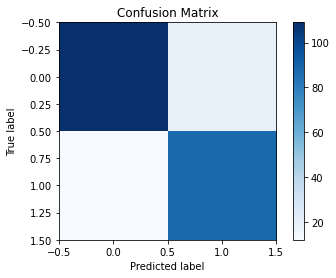

In [ ]:
# Create a random forest classifier with the best value for n_estimators
model = RandomForestClassifier(n_estimators=500)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the accuracy of the predictions
print(classification_report(y_test, predictions))
print("RandomForestClassifierr:>",accuracy_score(y_test, predictions))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
# Visualize the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

0.9433203125


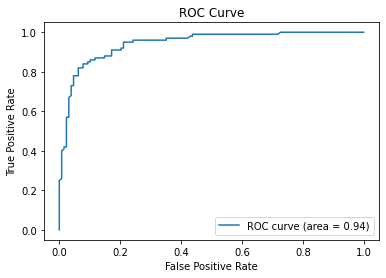

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Then, make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Next, calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Finally, calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)  # prints the AUC value

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

## 6.5 Naive Bayes

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       128
           1       0.80      0.77      0.79       100

    accuracy                           0.82       228
   macro avg       0.81      0.81      0.81       228
weighted avg       0.82      0.82      0.82       228

GaussianNB:> 0.8157894736842105


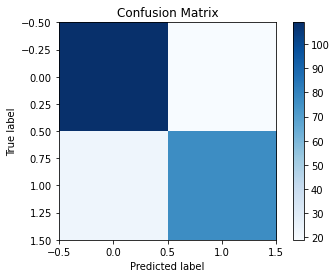

In [ ]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the accuracy of the predictions
print(classification_report(y_test, predictions))
print("GaussianNB:>",accuracy_score(y_test, predictions))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
# Visualize the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

0.8936718749999999


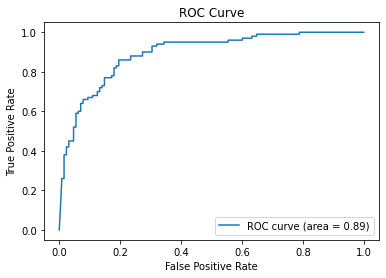

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Then, make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Next, calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Finally, calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)  # prints the AUC value

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

## 6.6 Decision trees

# New section

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       128
           1       0.81      0.79      0.80       100

    accuracy                           0.83       228
   macro avg       0.83      0.82      0.83       228
weighted avg       0.83      0.83      0.83       228

DecisionTreeClassifier:> 0.8289473684210527


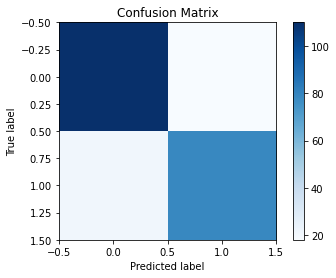

In [ ]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the accuracy of the predictions
print(classification_report(y_test, predictions))
print("DecisionTreeClassifier:>",accuracy_score(y_test, predictions))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
# Visualize the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

0.8246875


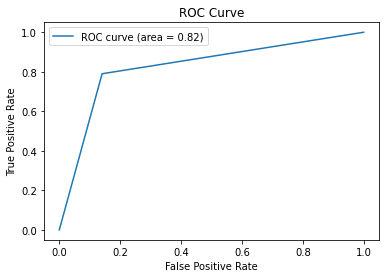

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Then, make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Next, calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Finally, calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)  # prints the AUC value

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()